In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data
y = digits.target
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [2]:
print(X.shape,'\n', y.shape)

(1797, 64) 
 (1797,)


In [3]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
cv_score = cross_validation.cross_val_score(model, X, y, cv=10)
print(cv_score.shape)
print(np.mean(cv_score))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Python36_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(10,)
0.824267768585238


In [4]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(model, n_estimators=100)
cv_score_bag = cross_validation.cross_val_score(bag_model, X, y, cv=10)
print(cv_score_bag.shape)
print(np.mean(cv_score_bag))

(10,)
0.9216019775925893


In [13]:
print(X[1].shape)
def chunks(l, n):
    return np.array([l[i:i+n] for i in range(0, len(l), n)])

new = chunks(X[4], 8)
print(new.shape)

(64,)
(8, 8)


4


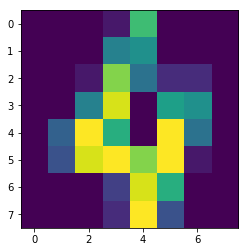

In [16]:
plt.imshow(new)
print(y[4])

In [19]:
bag_model1 = BaggingClassifier(model, n_estimators=100, max_features=int(np.sqrt(X.shape[1])))
cv_score_bag1 = cross_validation.cross_val_score(bag_model1, X, y, cv=10)
print(cv_score_bag1.shape)
print(np.mean(cv_score_bag1))

(10,)
0.9321160815906196


In [29]:
tree_model = DecisionTreeClassifier(splitter='random', max_features=int(np.sqrt(X.shape[1])))
bag_model2 = BaggingClassifier(tree_model, n_estimators=100, bootstrap=False)
cv_score_bag2 = cross_validation.cross_val_score(bag_model2, X, y, cv=10)
cv_score_tree = cross_validation.cross_val_score(tree_model, X, y, cv=10)
print(np.mean(cv_score_bag2))
print(np.mean(cv_score_tree))

0.9611708605259066
0.7452104826077086


In [20]:
from sklearn.ensemble import RandomForestClassifier
model_rfc = RandomForestClassifier()
cv_score_rfc = cross_validation.cross_val_score(model_rfc, X, y, cv=10)
print(np.mean(cv_score_rfc))

0.9164894363022966


In [21]:
num_trees = np.arange(1, 200, 10)
num_features = np.arange(1, X.shape[1]+1, 1)
depths = np.arange(1, 100, 5)

In [22]:
a = []
nn = 0
for i in num_trees:
    nn += 1
    print(nn)
    temp_tree = DecisionTreeClassifier(splitter='best')
    temp_model = BaggingClassifier(temp_tree, n_estimators=i)
    temp_score = cross_validation.cross_val_score(temp_model, X, y, cv=10)
    a.append(np.mean(temp_score))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0,0.5,'Score')

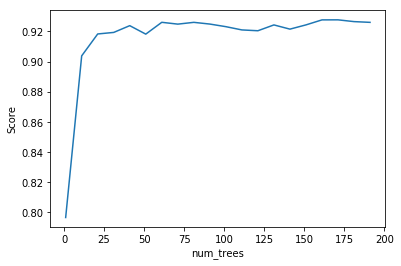

In [23]:
plt.plot(num_trees, a)
plt.xlabel("num_trees")
plt.ylabel("Score")

In [24]:
a = []
nn = 0
for i in num_features:
    nn += 1
    print(nn)
    temp_tree = DecisionTreeClassifier(splitter='best', max_features=i)
    temp_model = BaggingClassifier(temp_tree, max_features=i)
    temp_score = cross_validation.cross_val_score(temp_model, X, y, cv=10)
    a.append(np.mean(temp_score))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64


Text(0,0.5,'Score')

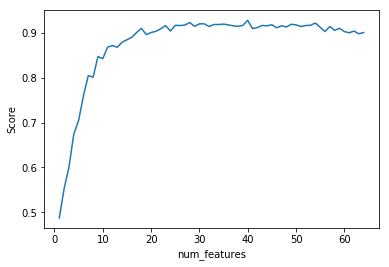

In [26]:
plt.plot(num_features, a)
plt.xlabel("num_features")
plt.ylabel("Score")

In [27]:
nn = 0
b = []
for i in depths:
    nn += 1
    print(nn)
    temp_tree = DecisionTreeClassifier(splitter='best', max_depth=i)
    temp_model = BaggingClassifier(temp_tree)
    temp_score = cross_validation.cross_val_score(temp_model, X, y, cv=10)
    b.append(np.mean(temp_score))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0,0.5,'Score')

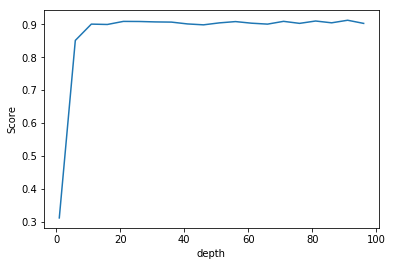

In [28]:
 plt.plot(depths, b)
plt.xlabel("depth")
plt.ylabel("Score")